In [10]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load data from Github

In [11]:
def str_to_float(s):
    try:
        # Parse strings with decimal (,) separators
        return float(s.replace(',','.')) if type(s) == str else s
    except ValueError:
        return None

def str_to_date(s):
    try:
        # Parse dates
        return datetime.strptime(s,'%Y-%m-%d') if type(s) == str else s
    except ValueError:
        return None

In [12]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

covid_data_df = pd.read_csv(
    url,
    converters={'total_deaths_per_million': str_to_float,
                'date': str_to_date
               },
    low_memory=False
)

## Select countries

In [13]:
countries = [
'Finland',
'France',
'Germany',
'Italy',
'Portugal',
'Spain',
'Sweden',
'Switzerland',
'United Kingdom'
]

countries = [
'Finland',
'France',
'Portugal',
'Spain',
'Sweden',
'United Kingdom'
]

covid_data_df = covid_data_df[covid_data_df['location'].isin(countries)]

In [22]:
def plot_serie(data_frame):
    plt.rcParams['figure.figsize'] = [12, 10]
    plt.rcParams['figure.dpi'] = 200

    # fig = plt.figure()
    # fig.suptitle('Death per million', fontsize=15)

    fig, ax = plt.subplots()
    
    for key, grp in data_frame.groupby(['location']): 
        ax.set_xlabel('Date')
        ax.set_ylabel('new_cases_smoothed_per_million', color='red')
        ax.plot(grp['date'], grp['new_cases_smoothed_per_million'], label = key)
        ax.tick_params(axis='y', labelcolor='red')
        
        ax2 = ax.twinx()
        
        ax2.set_ylabel('total_vaccinations_per_hundred', color='blue')
        ax2.plot(grp['date'], grp['total_vaccinations_per_hundred'], label = key)
        ax2.tick_params(axis='y', labelcolor='blue')

    fig.tight_layout()
    plt.xlabel('Date', fontsize=16)

    plt.show()

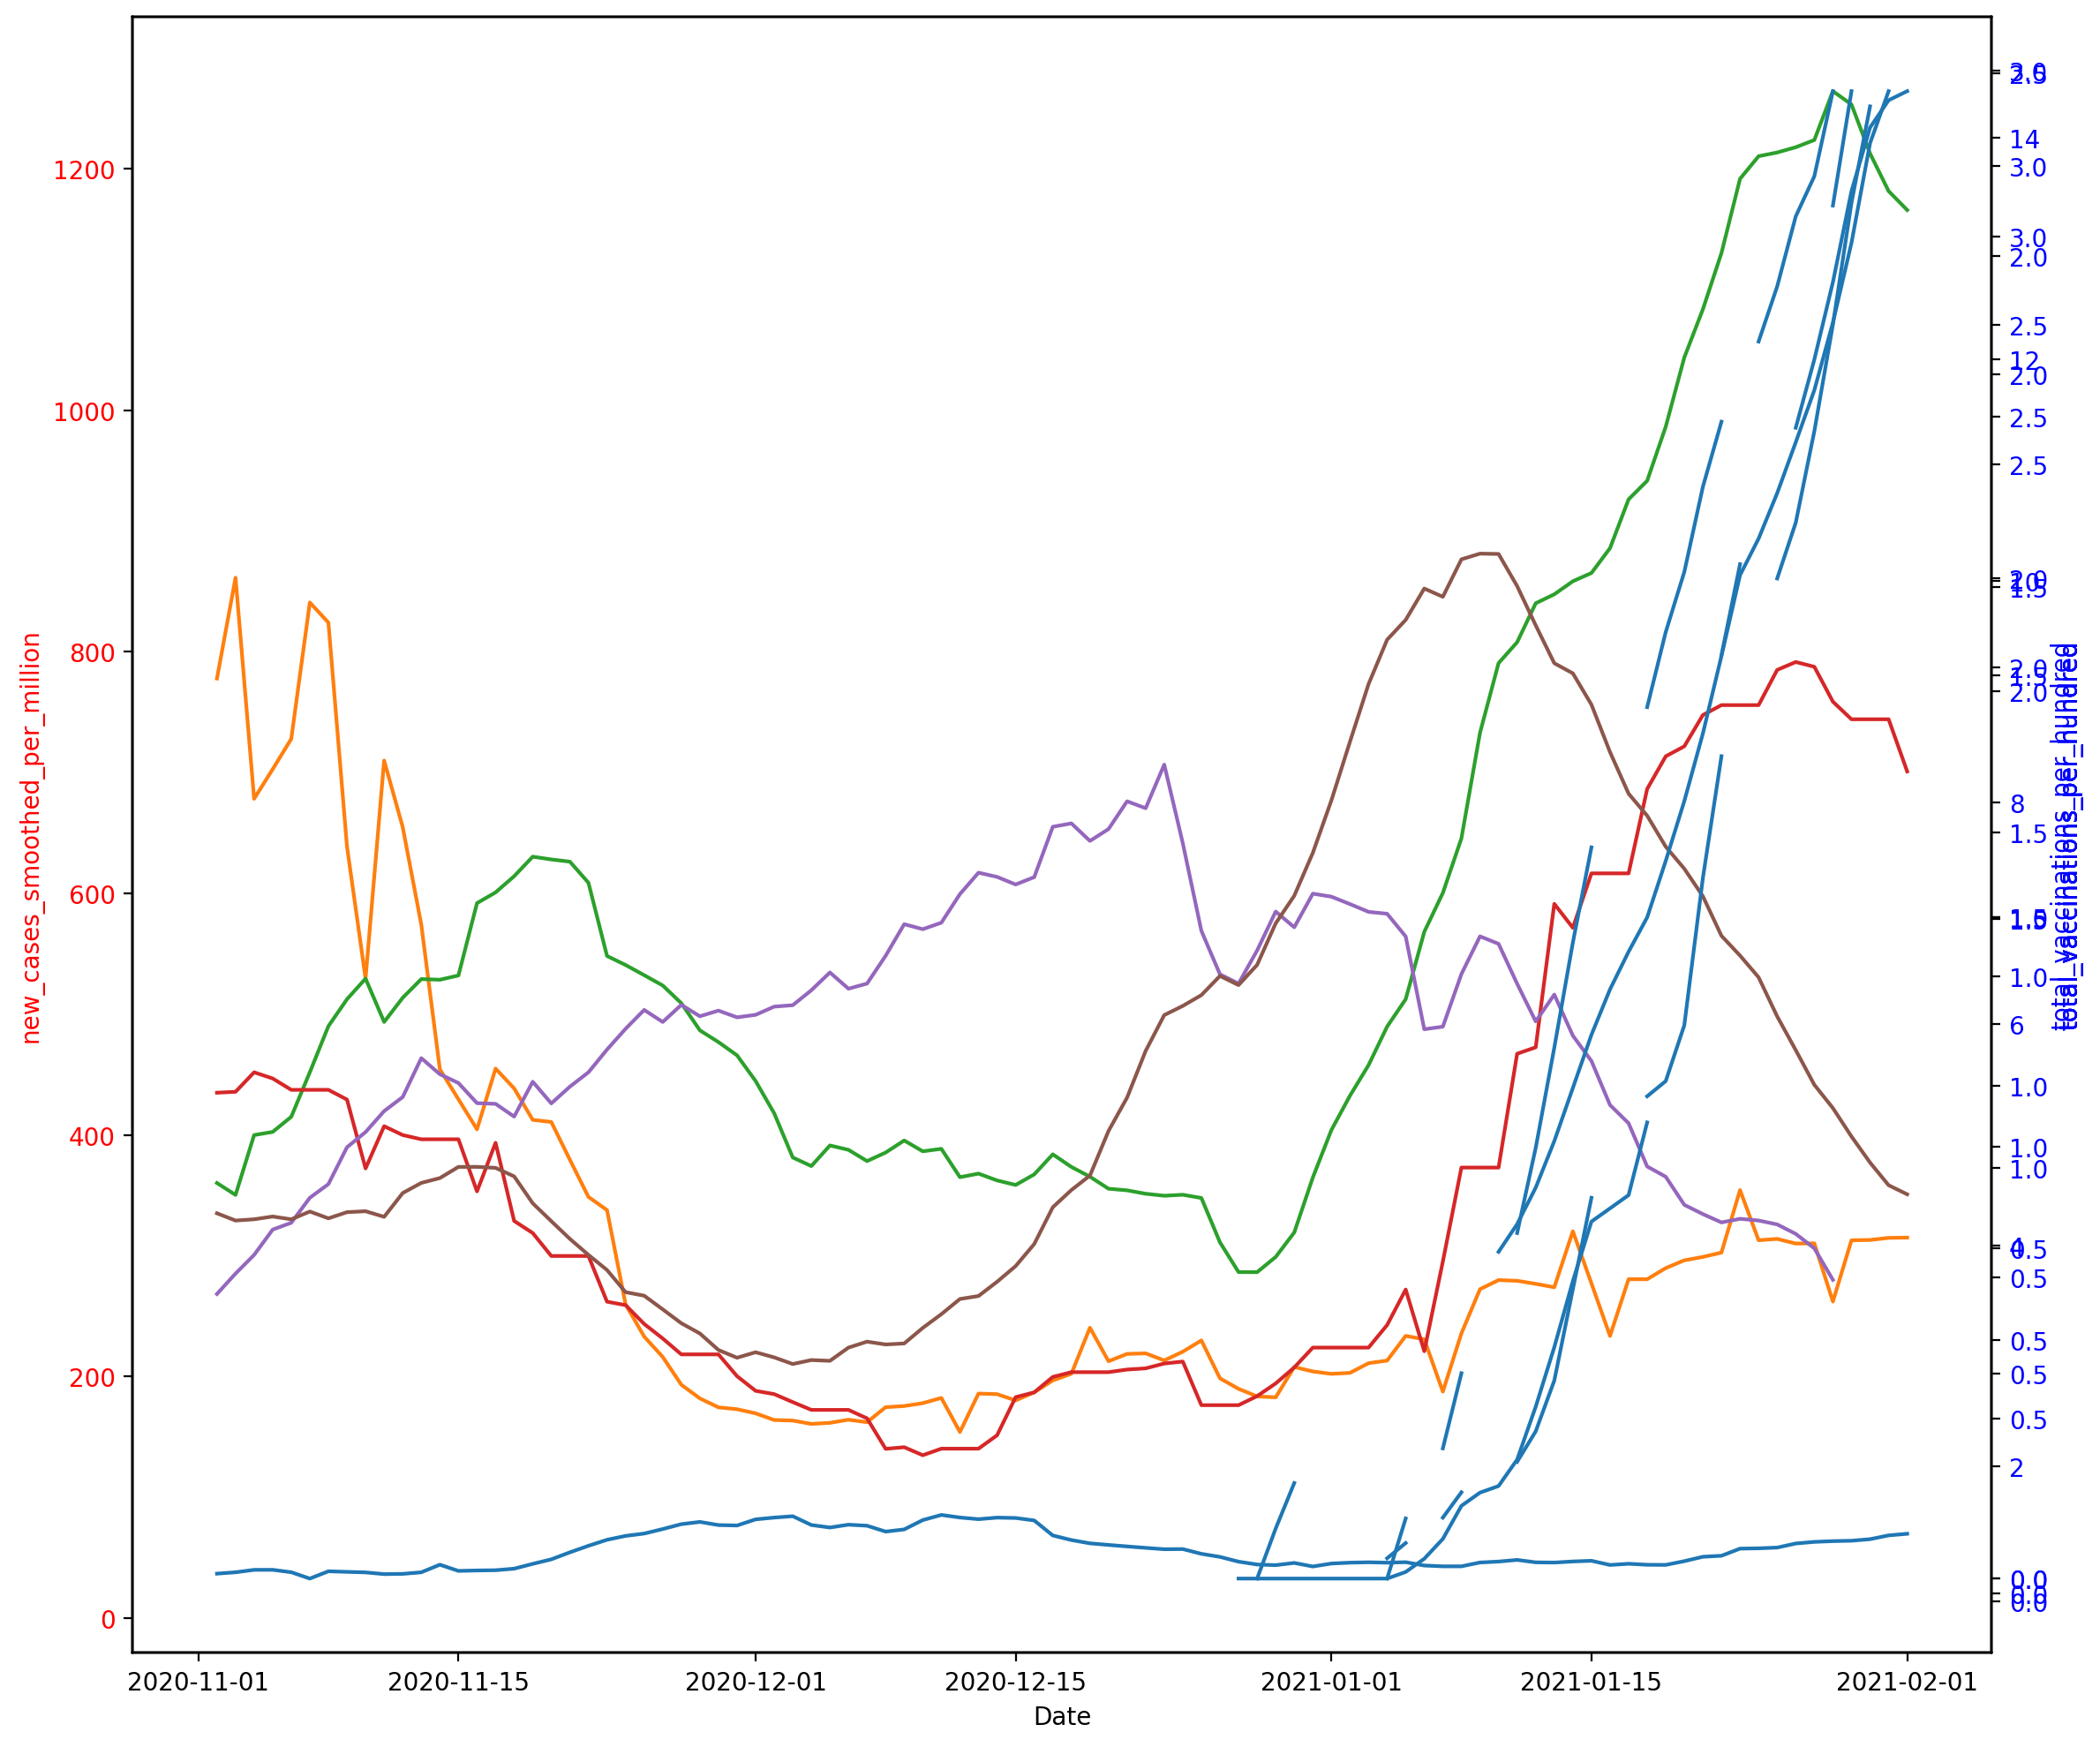

In [23]:
data_frame = covid_data_df[(covid_data_df['date'] > '2020-11-01')]
plot_serie(data_frame)